In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Calculate the following statistical metrics for each one of the features (except dteday): min, max, mean, standard deviation, minN, maxN, Q1, Q2 (median), Q3, IQR

In [142]:
def IQR(name):
    for i in range(0,name.size):
        print('----------------------------',name[i],'----------------------------')
        q1 = df[name[i]].describe()[4]
        q3 = df[name[i]].describe()[6]
        iqr = q3 - q1
        print("IQR: ", iqr)
        print("minN: ", q1 - 1.5*iqr )
        print("maxN: ", q3 + 1.5*iqr )
        x = df[name[i]].describe()
        print(x,'\n')
        
#I create a function to reduce lines

In [143]:
df = pd.read_csv('bike.csv', encoding='ISO-8859-1')
arr = np.array(['instant','holiday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt'])
IQR(arr)

---------------------------- instant ----------------------------
IQR:  365.0
minN:  -364.0
maxN:  1096.0
count    731.000000
mean     366.000000
std      211.165812
min        1.000000
25%      183.500000
50%      366.000000
75%      548.500000
max      731.000000
Name: instant, dtype: float64 

---------------------------- holiday ----------------------------
IQR:  0.0
minN:  0.0
maxN:  0.0
count    731.000000
mean       0.028728
std        0.167155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64 

---------------------------- season ----------------------------
IQR:  1.0
minN:  0.5
maxN:  4.5
count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64 

---------------------------- yr ----------------------------
IQR:  1.0
minN:  -1.5
maxN:  2.5
count    731.000000
mean      

### <font color='pink'>_1. Comment:_</font>
<font color='pink' size='2'>
The registered's people mean is really high, this means a lot of people likes being registered than being just a casual user. I would try to explain this with some graphics and analisis of correlation between features.
</font>

## 2. Graph for each feature: histogram and boxplot

In [60]:
def hist_box(name):
    for i in range(0,name.size): 
        print(name[i],':')
        plt.figure()
        plt.subplot(1,2,1)
        plt.hist(df[name[i]].values, bins=13)
        plt.subplot(1,2,2)
        plt.boxplot(df[name[i]].values)
        plt.show()

instant :


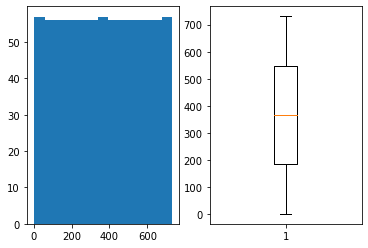

holiday :


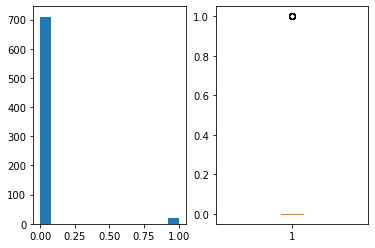

season :


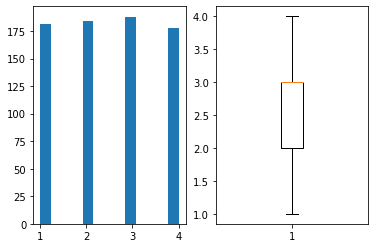

yr :


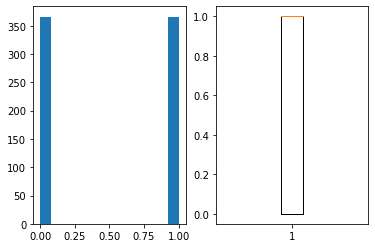

mnth :


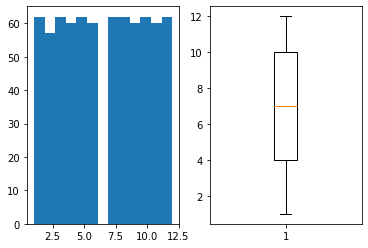

weekday :


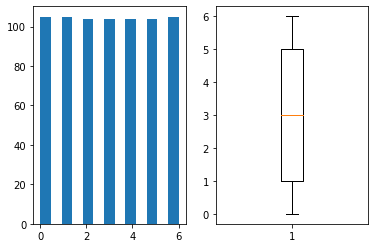

workingday :


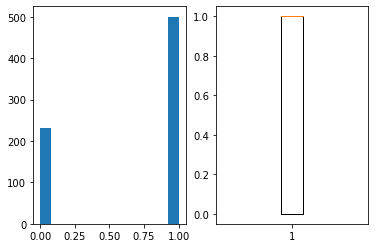

weathersit :


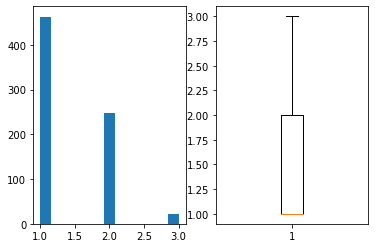

temp :


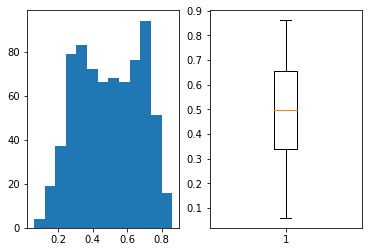

atemp :


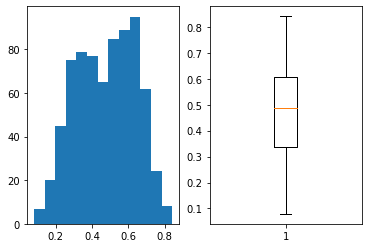

hum :


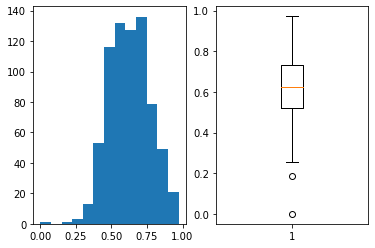

windspeed :


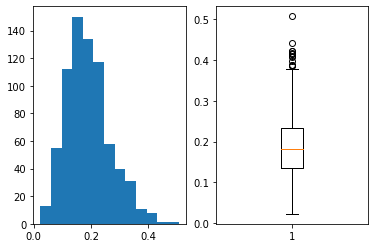

casual :


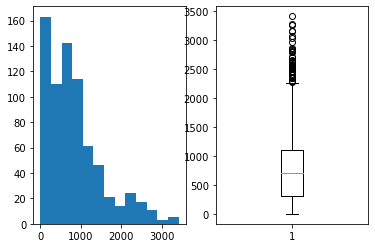

registered :


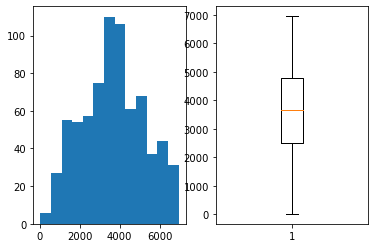

cnt :


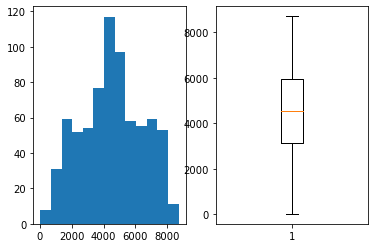

In [161]:
arr = np.array(['instant','holiday','season','yr','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt'])
hist_box(arr)

### <font color='pink'>_Comment:_</font>
<font color='pink' size='2'>
The more important features to consider would be:
    -cnt (the number of rented bikes)
    -registered (registered users) #it has a lot of relation (registered, cnt)
    -casual (non-registered users)
    -season
    -holiday
    -atemp 
    
    
    I think it's more important to use atemp than 'temp', because we don't actually care if the temp is 15°,
    if there is a lot of sun and the feeling of the temperature is 23°, we feel just 
    fine riding because we are not freezing)
</font>

## 3. Graph the correlation matrix (showing the absolute values)

In [67]:
#normal correlation
corr = df.corr() #-1 -> 1
corr.to_csv('correlation-matrix.csv')
corr

#Absolute correlation
absCorr = df.corr()
corr2 = pd.DataFrame(np.round(np.abs(absCorr.values),2), index = absCorr.index, columns=absCorr.columns)
corr2
# dfcabs.to_csv('BikeAbsCorr.csv') ## UNCOMMENT IF A CSV IS NEEDED.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.00,0.41,0.87,0.50,0.02,0.00,0.00,0.02,0.15,0.15,0.02,0.11,0.28,0.66,0.63
season,0.41,1.00,0.00,0.83,0.01,0.00,0.01,0.02,0.33,0.34,0.21,0.23,0.21,0.41,0.41
yr,0.87,0.00,1.00,0.00,0.01,0.01,0.00,0.05,0.05,0.05,0.11,0.01,0.25,0.59,0.57
mnth,0.50,0.83,0.00,1.00,0.02,0.01,0.01,0.04,0.22,0.23,0.22,0.21,0.12,0.29,0.28
holiday,0.02,0.01,0.01,0.02,1.00,0.10,0.25,0.03,0.03,0.03,0.02,0.01,0.05,0.11,0.07
weekday,0.00,0.00,0.01,0.01,0.10,1.00,0.04,0.03,0.00,0.01,0.05,0.01,0.06,0.06,0.07
workingday,0.00,0.01,0.00,0.01,0.25,0.04,1.00,0.06,0.05,0.05,0.02,0.02,0.52,0.30,0.06
weathersit,0.02,0.02,0.05,0.04,0.03,0.03,0.06,1.00,0.12,0.12,0.59,0.04,0.25,0.26,0.30
temp,0.15,0.33,0.05,0.22,0.03,0.00,0.05,0.12,1.00,0.99,0.13,0.16,0.54,0.54,0.63
atemp,0.15,0.34,0.05,0.23,0.03,0.01,0.05,0.12,0.99,1.00,0.14,0.18,0.54,0.54,0.63


### <font color='pink'>_Comment:_</font>
<font color='pink' size='2'>High relation between the feeling temperature (atemp) and the real temperature (temp)-
Very low relation (0) between the weekday and the season. They have nothing to do with it at all.
</font>

## 4. Graph the scatter plot using the feature cnt and the one with the highest correlation with that feature (cnt). And the same with the feature with the lowest correlation.

<AxesSubplot:xlabel='cnt', ylabel='registered'>

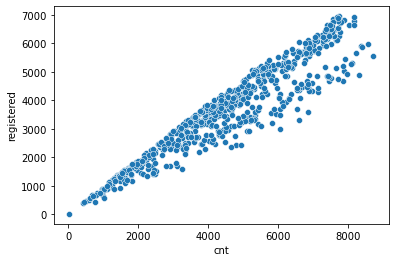

In [84]:
sns.scatterplot(data=df, x='cnt', y='registered') #highest 

<font color='pink' size='2'>This means that as more registered users, more cnt (total of rented bikes).
</font>

<AxesSubplot:xlabel='cnt', ylabel='workingday'>

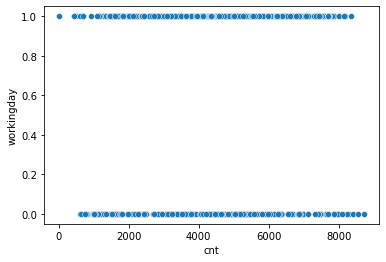

In [83]:
sns.scatterplot(data=df, x='cnt', y='workingday') #lowest 

<font color='pink' size='2'>This means that this two features have nothing to do with it. That's why I wouldn't consider it to analize this case. 
</font>

## 5. Graph one scatter plot using four features: x, y, size, and color

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

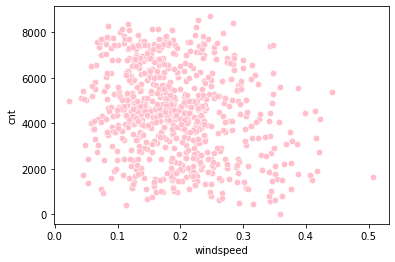

In [97]:
sns.scatterplot(data=df, x='windspeed', y='cnt', s=40, color='pink')

## 6. Write at least four insights from the data (justifying with metrics or graphs). Insights consist of some interesting facts that you discover from the Exploratory Data Analysis

### <font color='pink'>_Comment:_</font>
<font color='pink' size='2'>
1. In the last graphic we can see that there is almost no relation between cnt and windspeed. We can appreciate a disperse fluid in this plot.
We can deduce that users don't actually care if there is wind or not.
</font>

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

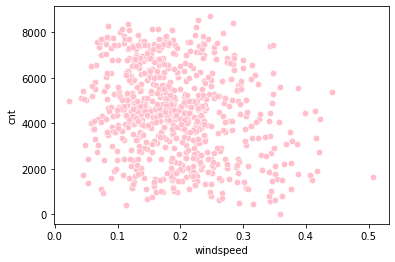

In [97]:
sns.scatterplot(data=df, x='windspeed', y='cnt', s=40, color='pink')

In [155]:
dfc = df.corr()
dfcabs = pd.DataFrame(np.round(np.abs(dfc.values),2), index = dfc.index, columns=dfc.columns)
dfcabs

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.00,0.41,0.87,0.50,0.02,0.00,0.00,0.02,0.15,0.15,0.02,0.11,0.28,0.66,0.63
season,0.41,1.00,0.00,0.83,0.01,0.00,0.01,0.02,0.33,0.34,0.21,0.23,0.21,0.41,0.41
yr,0.87,0.00,1.00,0.00,0.01,0.01,0.00,0.05,0.05,0.05,0.11,0.01,0.25,0.59,0.57
mnth,0.50,0.83,0.00,1.00,0.02,0.01,0.01,0.04,0.22,0.23,0.22,0.21,0.12,0.29,0.28
holiday,0.02,0.01,0.01,0.02,1.00,0.10,0.25,0.03,0.03,0.03,0.02,0.01,0.05,0.11,0.07
weekday,0.00,0.00,0.01,0.01,0.10,1.00,0.04,0.03,0.00,0.01,0.05,0.01,0.06,0.06,0.07
workingday,0.00,0.01,0.00,0.01,0.25,0.04,1.00,0.06,0.05,0.05,0.02,0.02,0.52,0.30,0.06
weathersit,0.02,0.02,0.05,0.04,0.03,0.03,0.06,1.00,0.12,0.12,0.59,0.04,0.25,0.26,0.30
temp,0.15,0.33,0.05,0.22,0.03,0.00,0.05,0.12,1.00,0.99,0.13,0.16,0.54,0.54,0.63
atemp,0.15,0.34,0.05,0.23,0.03,0.01,0.05,0.12,0.99,1.00,0.14,0.18,0.54,0.54,0.63


<font color='pink' size='2'>
2. Here we can see that there is a strong relation between registered and cnt. This could be explained if we think that the people use a lot bikes, in this way they might prefer to be registered (frecuent client).
We can infer somehow that they might have a benefit because of being registered, maybe '2x1 in bikes rent' or something that might be attracting those users to register themselves.
</font>

<font color='pink' size='2'>
3. We can also see that humidity doesn't really matter to the users, they don't actually care about it, there is a very small relation between it and cnt. Sometimes actually is better to have a high humedity to ride a bike, but it seems users don't really care.</font>

<AxesSubplot:>

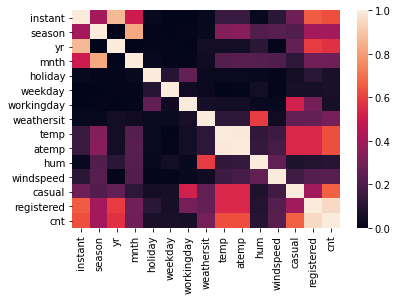

In [160]:
sns.heatmap(dfcabs, annot=False) 

<font color='pink' size='2'>
4. Holidays and cnt have almost nothing of relation between. Honestly, quite the opposite I thought, because I deduced that as we all have vacations in holidays, many people likes to do activities to releaf stress, riding a bike is a great option.</font>

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

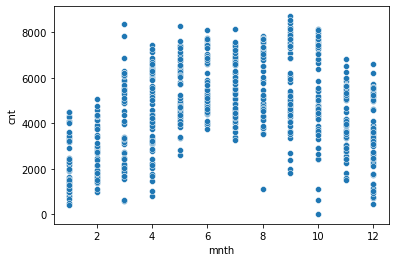

In [166]:
sns.scatterplot(data=df, x='mnth', y='cnt')

<font color='pink' size='2'>
5. We can appreciate that during summer they were rented a lot. But at the start of the year, they didn't have many success.</font>